# W-14

In [10]:
from FMM_BEM_corrected import read_geo_and_create_quadtree, assem_fmm, surf_plot, eval_sol, m2l_translation,upward_pass, l2l_translation
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mesh, coords, elems, x_m, y_m, id_dir, id_neu, quadtree, boundary_points = read_geo_and_create_quadtree("files\disk.msh",[0, 1], [2, 3],max_points_quad=1,max_depth=20)

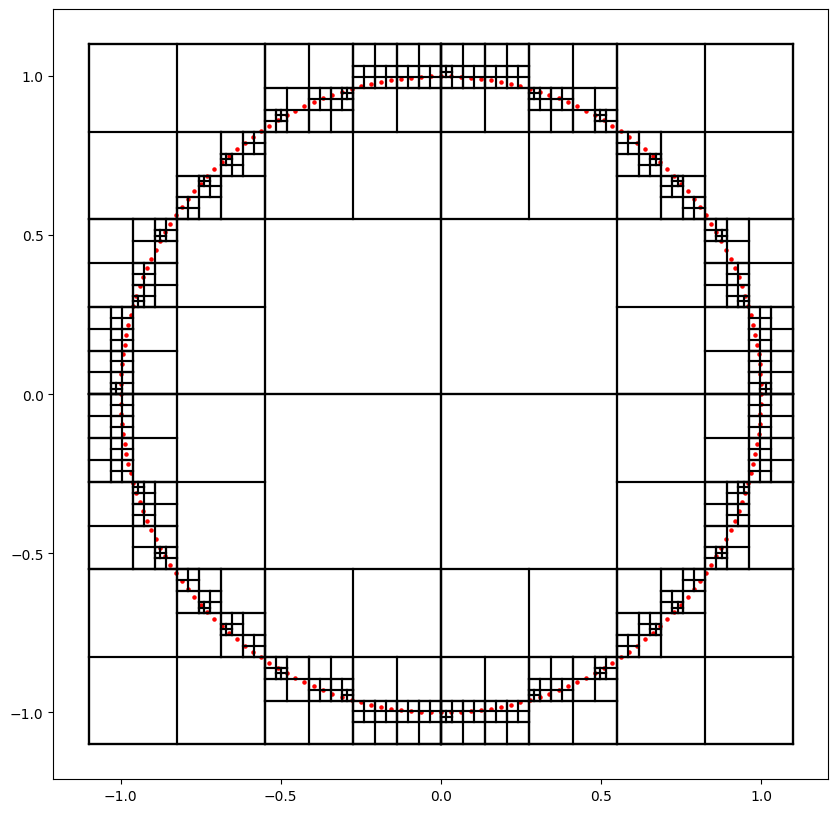

In [3]:
def plot_quadtree(node, ax):
    """ Función recursiva para dibujar los límites del quadtree. """
    xmin, ymin, xmax, ymax = node.bounds
    ax.plot([xmin, xmax], [ymin, ymin], 'k-')
    ax.plot([xmin, xmax], [ymax, ymax], 'k-')
    ax.plot([xmin, xmin], [ymin, ymax], 'k-')
    ax.plot([xmax, xmax], [ymin, ymax], 'k-')

    for child in node.children:
        plot_quadtree(child, ax)

# Visualizar el quadtree
fig, ax = plt.subplots(figsize=(10,10))
plot_quadtree(quadtree, ax)
ax.scatter(boundary_points[:, 0], boundary_points[:, 1], color='red', s=5)  # Dibujar los puntos de la frontera
plt.show()

In [4]:
Gmat, Fmat = assem_fmm(coords,elems,quadtree,3)

d:\Onedrive Uni\OneDrive - Universidad EAFIT\Universidad\2024-2\Elementos de frontera\FMM-BEM-\FMM_BEM_corrected.py:362: ComplexWarning: Casting complex values to real discards the imaginary part
  Gmat[ev_cont, col_cont] += np.sum(m2l_translation(node2.multipole_moments, dx, dy, order))
d:\Onedrive Uni\OneDrive - Universidad EAFIT\Universidad\2024-2\Elementos de frontera\FMM-BEM-\FMM_BEM_corrected.py:363: ComplexWarning: Casting complex values to real discards the imaginary part
  Hmat[ev_cont, col_cont] += np.sum(l2l_translation(node2.local_expansion, dx, dy, order))


In [7]:
upward_pass(quadtree,3)


array([ 2.00000000e+02+0.00000000e+00j,  1.42108547e-14+6.87500000e-02j,
       -2.16492757e+00-2.30062746e-07j, -5.94290475e-01+6.32316816e-01j])

In [23]:
for ev_cont, elem1 in enumerate(elems):
        for col_cont, elem2 in enumerate(elems):
            pt_col = np.mean(coords[elem2], axis=0)

            # Usamos find_point_location para obtener los nodos correspondientes a cada elemento
            node_info1 = quadtree.find_point_location(np.mean(coords[elem1], axis=0))
            node_info2 = quadtree.find_point_location(pt_col)
            
            node1 = node_info1['leaf']
            node2 = node_info2['leaf']

            interaction_list = node1.compute_interaction_list()
            if node2 in interaction_list:
                    dx = node2.center[0] - node1.center[0]
                    dy = node2.center[1] - node1.center[1]
                    # Traducción multipolar M2L para interacciones lejanas
                    print(m2l_translation(node2.multipole_moments, dx, dy, 10))
                    print(l2l_translation(node2.local_expansion, dx, dy, 10))

[ 2.65139415e+01+5.11773762e+00j -2.33186594e+02+5.70414411e+02j
 -1.17208860e+04-7.77106520e+03j  2.26355075e+05-2.27505968e+05j
  4.07798496e+06+6.08349691e+06j -1.54385318e+08+6.40287681e+07j
 -7.41856325e+08-3.74133867e+09j  8.70424600e+10+1.43472080e+08j
 -3.92771224e+11+1.94716119e+12j -4.18149806e+13-1.75038537e+13j
  5.78838597e+14-8.57380919e+14j]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j]
[ 8.48231405e+00-4.44559034e-02j -4.96102979e+01-4.90929929e+01j
  3.00977488e+00+5.74273692e+02j  3.32371734e+03-3.35874017e+03j
 -3.88797528e+04+2.03769222e+02j  2.27395037e+05+2.25023904e+05j
 -1.37956815e+04-2.63225566e+06j -1.52346762e+07+1.53952078e+07j
  1.78210234e+08-9.34001844e+05j -1.04229374e+09-1.03142535e+09j
  6.32342406e+07+1.20652747e+10j]
[ 1.80988498e+01+3.83714599e+00j -1.22050496e+02-3.47884757e+02j
 -4.65958430e+03+5.67983715e+03j  1.44949117e+05+2.05306134e+04j
 -5.73858713e+04+4.23535290e+04j  3.29535855e+03-2.14344821e+04j
  3.112

In [6]:
Gmat

array([[2.57670834e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.75283630e-02],
       [2.14427516e+05, 2.57670834e-02, 1.75283629e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.75283629e-02, 2.57670834e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.57670833e-02, 1.75283629e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.75283629e-02, 2.57670833e-02, 1.75283629e-02],
       [1.75283629e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.75283629e-02, 2.57670833e-02]])

In [7]:
Fmat

array([[-0.5       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.00333339],
       [ 0.        , -0.5       ,  0.00333339, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00333339, -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.5       ,
         0.00333339,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00333339,
        -0.5       ,  0.00333339],
       [ 0.00333339,  0.        ,  0.        , ...,  0.        ,
         0.00333339, -0.5       ]])

In [6]:
A = np.zeros_like(Fmat)
B = np.zeros_like(Fmat)

In [7]:
A[np.ix_(id_dir, id_dir)] = Gmat[np.ix_(id_dir, id_dir)]
A[np.ix_(id_dir, id_neu)] = -Fmat[np.ix_(id_dir, id_neu)]
A[np.ix_(id_neu, id_dir)] = Gmat[np.ix_(id_neu, id_dir)]
A[np.ix_(id_neu, id_neu)] = -Fmat[np.ix_(id_neu, id_neu)]


In [8]:
B[np.ix_(id_dir, id_dir)] = Fmat[np.ix_(id_dir, id_dir)]
B[np.ix_(id_dir, id_neu)] = -Gmat[np.ix_(id_dir, id_neu)]
B[np.ix_(id_neu, id_dir)] = Fmat[np.ix_(id_neu, id_dir)]
B[np.ix_(id_neu, id_neu)] = -Gmat[np.ix_(id_neu, id_neu)]

In [9]:
theta = np.unwrap(np.arctan2(y_m, x_m))
rhs = np.zeros(elems.shape[0])
rhs[id_dir] = 3*np.cos(6*theta[id_dir])
rhs[id_neu] = -18*np.cos(6*theta[id_neu])

In [10]:
from numpy.linalg import norm, solve
sol = solve(A, B.dot(rhs))

In [11]:
u_bound = np.zeros_like(sol)
q_bound = np.zeros_like(sol)
u_bound[id_dir] = rhs[id_dir]
u_bound[id_neu] = sol[id_neu]
q_bound[id_dir] = sol[id_dir]
q_bound[id_neu] = rhs[id_neu]

In [12]:
solution = eval_sol(mesh.points[:, :2], coords, elems, u_bound, q_bound)

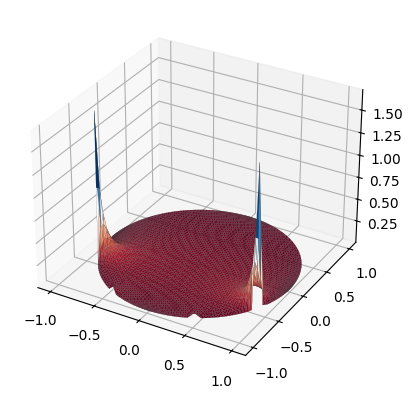

In [13]:
ax = surf_plot(mesh, 4, solution);